# Custom stacks
Let's use EOReader with custom stacks.

In [1]:
# EOReader Imports
import os
from eoreader.reader import Reader
from eoreader.products import SensorType
from eoreader.bands import BLUE, GREEN, RED, NIR, SWIR_1, VV, VV_DSPK, SLOPE, HILLSHADE
from sertit import display

reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

In [3]:
# Set a DEM
from eoreader.env_vars import DEM_PATH

os.environ[DEM_PATH] = os.path.join("/home", "ds2_db2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

## Custom stack with minimum data
For both SAR and optical stacks, the two minimum keywords to provide are:
- `band_map`: a dictionary mapping the satellite band to the band number (starting to 1, in GDAL style)
- `sensor_type`: Either `SAR` or `OPTICAL` (a string or a SensorType Enum)

In [4]:
# Paths
stack_folder = os.path.join("/home", "ds2_db3", "CI", "eoreader", "others")
opt_path = os.path.join(stack_folder, "20200310T030415_WV02_Ortho_BGRN_STK.tif")
sar_path = os.path.join(stack_folder, "20210827T162210_ICEYE_SC_GRD_STK.tif")

In [5]:
# Optical minimum example
opt_prod = reader.open(opt_path,
                       custom=True,
                       sensor_type="OPTICAL",  # With a string
                       band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5})
opt_prod

eoreader.CustomProduct '20200310T030415_WV02_Ortho_BGRN_STK'
Attributes:
	condensed_name: 20200310T030415_WV02_Ortho_BGRN_STK
	path: /home/ds2_db3/CI/eoreader/others/20200310T030415_WV02_Ortho_BGRN_STK.tif
	constellation: CUSTOM
	sensor type: Optical
	product type: CUSTOM
	default pixel size: 8.0
	default resolution: None
	acquisition datetime: 2025-12-23T09:16:28.825967
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		SWIR_1: 5
	needs extraction: False

In [6]:
opt_stack = opt_prod.stack([BLUE, GREEN, RED])

2025-12-23 09:16:28,833 - [DEBUG] - Loading bands ['BLUE', 'GREEN', 'RED']
/opt/conda/lib/python3.11/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(
2025-12-23 09:16:32,773 - [DEBUG] - Stacking


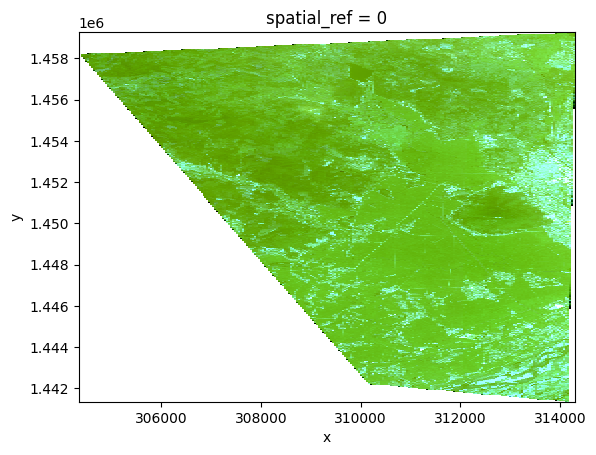

In [7]:
opt_stack[:, ::5, ::5].plot.imshow(robust=True)

In [8]:
opt_stack

<xarray.DataArray 'BLUE_GREEN_RED' (bands: 3, y: 2237, x: 1244)> Size: 33MB
dask.array<where, shape=(3, 2237, 1244), dtype=float32, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 10kB 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 18kB 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 8B 0
  * bands        (bands) object 24B MultiIndex
  * variable     (bands) object 24B SpectralBandNames.BLUE ... SpectralBandNa...
  * band         (bands) int64 24B 1 1 1
Attributes:
    path:              /tmp/tmppik6uc7_/tmp_20200310T030415_WV02_Ortho_BGRN_S...
    long_name:         BLUE GREEN RED
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/ds2_db3/CI/eoreader/others/20200310T030415_WV02_...
    product_name:      20200310T030415_WV02_Ortho_BGRN_STK
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20251223T091632
    condensed_name:    20200310T030415_WV02_Ortho_BGRN_STK
    orbit_direction:   None

In [9]:
# SAR minimum example
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,  # With the Enum
    band_map={VV: 1, VV_DSPK: 2}
)
sar_prod

eoreader.CustomProduct '20210827T162210_ICEYE_SC_GRD_STK'
Attributes:
	condensed_name: 20210827T162210_ICEYE_SC_GRD_STK
	path: /home/ds2_db3/CI/eoreader/others/20210827T162210_ICEYE_SC_GRD_STK.tif
	constellation: CUSTOM
	sensor type: SAR
	product type: CUSTOM
	default pixel size: 48.0
	default resolution: None
	acquisition datetime: 2025-12-23T09:16:33.228069
	band mapping:
		VV: 1
		VV_DSPK: 2
	needs extraction: False

In [10]:
sar_stack = sar_prod.stack([SLOPE, VV, VV_DSPK])

2025-12-23 09:16:33,236 - [DEBUG] - Loading bands ['VV', 'VV_DSPK']
2025-12-23 09:16:37,180 - [DEBUG] - Loading DEM bands ['SLOPE']
2025-12-23 09:16:37,181 - [DEBUG] - Warping DEM for 20210827T162210_ICEYE_SC_GRD_STK
2025-12-23 09:16:37,183 - [DEBUG] - Using DEM: /home/ds2_db2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt
2025-12-23 09:16:40,244 - [DEBUG] - Computing slope for 20210827T162210_ICEYE_SC_GRD_STK
2025-12-23 09:16:50,372 - [DEBUG] - Stacking


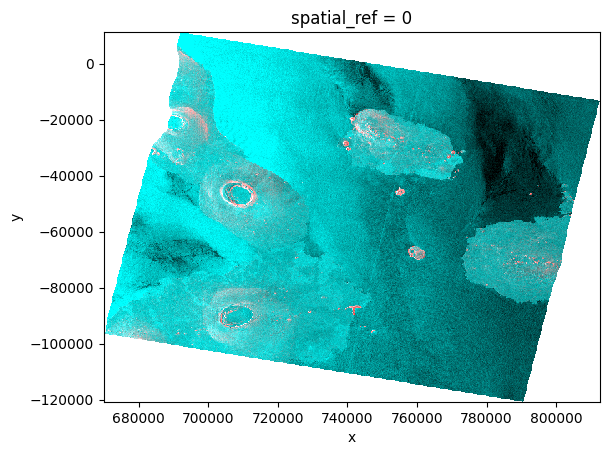

In [11]:
sar_stack[:, ::5, ::5].plot.imshow(robust=True)

In [12]:
sar_stack

<xarray.DataArray 'SLOPE_VV_VV_DSPK' (bands: 3, y: 2748, x: 2967)> Size: 98MB
dask.array<where, shape=(3, 2748, 2967), dtype=float32, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B 0
  * y            (y) float64 22kB 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
  * x            (x) float64 24kB 6.7e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * bands        (bands) object 24B MultiIndex
  * variable     (bands) object 24B DemBandNames.SLOPE ... SarBandNames.VV_DSPK
  * band         (bands) int64 24B 1 1 1
Attributes:
    path:              /tmp/tmpfg55_yem/tmp_20210827T162210_ICEYE_SC_GRD_STK/...
    long_name:         SLOPE VV VV_DSPK
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/ds2_db3/CI/eoreader/others/20210827T162210_ICEYE...
    product_name:      20210827T162210_ICEYE_SC_GRD_STK
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20251223T091650
    condensed_name:    20210827T162210_ICEYE_SC_GRD_STK
    orbit_direction:   None

'_vectorize' function is not lazy yet. Computing the raster.


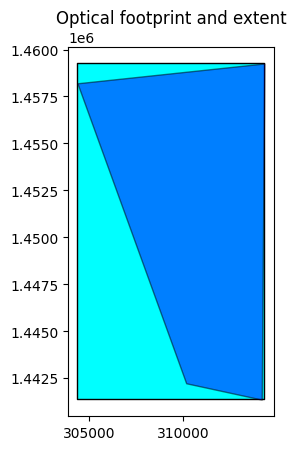

In [19]:
# You can compute the footprint and the extent
# Optical
extent = opt_prod.extent()
footprint = opt_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)
base.set_title("Optical footprint and extent");

'_vectorize' function is not lazy yet. Computing the raster.


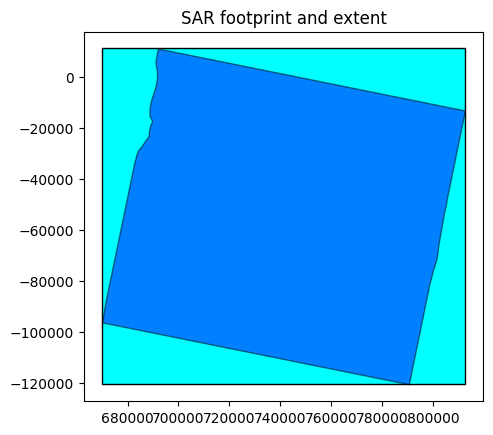

In [20]:
# SAR geometry
extent = sar_prod.extent()
footprint = sar_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)
base.set_title("SAR footprint and extent");

## Custom stack with full data 
If you know them, it is best to give **EOReader** all the data you know about your stack:
- `name`: product name. If not provided, the filename will be used
- `datetime`: product acquisition datetime. If not provided, the datetime of the creation of the object will be used
- `constellation`: product constellation. If not provided, `CUSTOM` will be set. Either a string of a Constellation enum.
- `product_type`: product type. If not provided, `CUSTOM` will be set.
- `pixel_size`: product default pixel size. If not provided, the stack pixel size will be used.

For optical products, two additional keyword can be set to compute the hillshade band:
- `sun_azimuth`
- `sun_zenith`

In [15]:
# Optical
opt_prod = reader.open(
    opt_path,
    custom=True,
    name="20200310T030415_WV02_Ortho",
    datetime="20200310T030415",
    sensor_type=SensorType.OPTICAL,
    constellation="WV02",
    product_type="Ortho",
    pixel_size=2.0,
    sun_azimuth=10.0,
    sun_zenith=20.0,
    band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5},
)
hillshade = opt_prod.load(HILLSHADE)[HILLSHADE]

2025-12-23 09:16:53,517 - [DEBUG] - Loading DEM bands ['HILLSHADE']
2025-12-23 09:16:53,518 - [DEBUG] - Warping DEM for 20200310T030415_WV02_Ortho
2025-12-23 09:16:53,519 - [DEBUG] - Using DEM: /home/ds2_db2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt
2025-12-23 09:16:56,637 - [DEBUG] - Computing hillshade DEM for 20200310T030415_WV02_Ortho


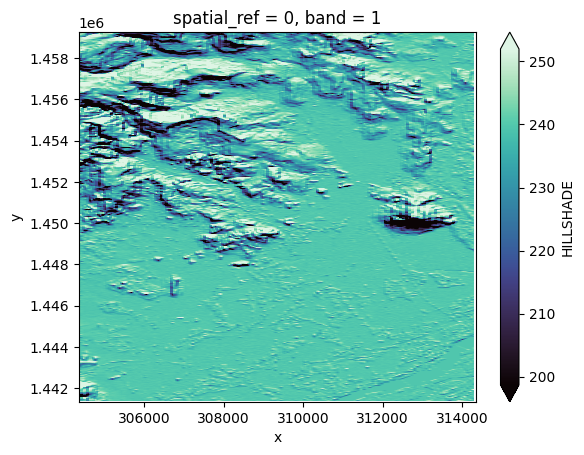

In [16]:
hillshade.plot(robust=True, cmap="mako")

In [17]:
# SAR
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,
    name="20210827T162210_ICEYE_SC_GRD",
    datetime="20210827T162210",
    constellation="ICEYE",
    product_type="GRD",
    pixel_size=6.0,
    band_map={VV: 1, VV_DSPK: 2},
)

In [18]:
from pprint import pprint
from eoreader import utils

# Read and display metadata
mtd, _ = sar_prod.read_mtd()
pprint(utils.quick_xml_to_dict(mtd))

('custom_metadata',
 {'band_map': "{'VV': 1, 'VV_DSPK': 2}",
  'cloud_cover': 'None',
  'condensed_name': '20210827T162210_ICEYE_GRD',
  'constellation': 'ICEYE',
  'datetime': '2021-08-27T16:22:10',
  'id': 'None',
  'instrument': 'CUSTOM',
  'name': '20210827T162210_ICEYE_SC_GRD',
  'orbit_direction': 'None',
  'pixel_size': '6.0',
  'product_type': 'GRD',
  'sensor_type': 'SAR',
  'sun_azimuth': 'None',
  'sun_zenith': 'None'})
